In [1]:
import pandas as pd

In [2]:
dataset = 'qm7'
target_column = 'u0_atom'

In [3]:
dfs = []
structures = ['3d', '2d', 'opt', 'pubchem', 'ac']
base_line_index = 4
for stucture in structures:
    dfs.append(pd.read_csv(f'/Users/sana/Downloads/qm7-errors/{dataset}-{stucture}.csv'))

In [4]:
for df in dfs:
    df['error'] = abs(df[f'pred_{target_column}'] - df[f'actual_{target_column}'])
    df.drop(columns=[f'pred_{target_column}', f'actual_{target_column}'], inplace=True)

In [5]:
errors_df = pd.merge(dfs[0], dfs[1], on='smiles').rename(columns={'error_x': f'{structures[0]}_error', 'error_y': f'{structures[1]}_error'})
for i in range(2, len(structures)):
    errors_df = pd.merge(errors_df, dfs[i], on='smiles').rename(columns={'error': f'{structures[i]}_error'})

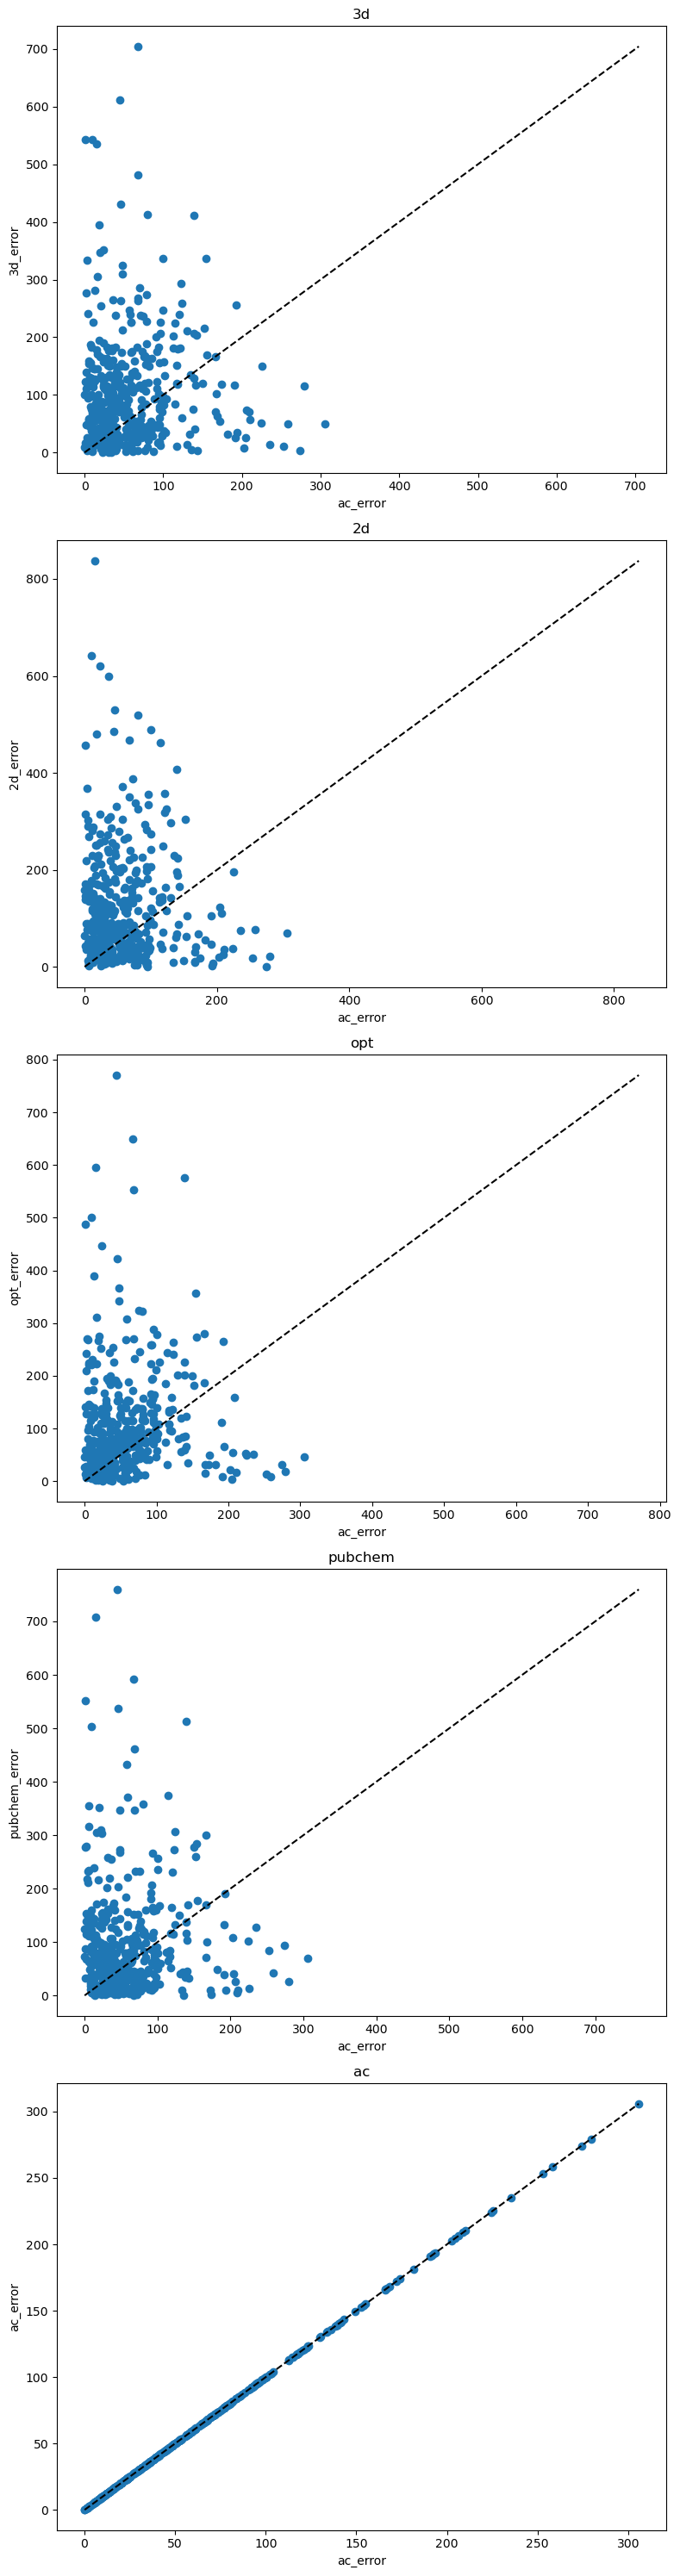

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=len(structures), figsize=(8, 6*len(structures)))
for i, structure in enumerate(structures):
    axs[i].scatter(errors_df[f'{structures[base_line_index]}_error'],errors_df[f'{structure}_error'])
    axs[i].set_title(structure)
    axs[i].set_ylabel(f'{structure}_error')
    axs[i].set_xlabel(f'{structures[base_line_index]}_error')
    min_val = min(errors_df[f'{structure}_error'].min(), errors_df[f'{structures[base_line_index]}_error'].min())
    max_val = max(errors_df[f'{structure}_error'].max(), errors_df[f'{structures[base_line_index]}_error'].max())
    axs[i].plot([min_val, max_val], [min_val, max_val], 'k--')
plt.tight_layout()
plt.show()